<a href="https://colab.research.google.com/github/X-SpectoX/cap-comp215/blob/2024.01/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - Project1
----------------
#### Name:Meharishwar,Sanchit

**Introduction**:
In this notebook, we will analyze Pokémon data obtained from the PokeAPI. The analysis includes retrieving Pokémon data from the API, constructing a graph to represent relationships between Pokémon, generating random Pokémon data for experimentation, and performing computational experiments using NetworkX.


In [15]:
import requests
import random
import networkx as nx
import matplotlib.pyplot as plt


**Retrieve Pokémon Data from the API:**<br>
We used https://pokeapi.co/api/v2/pokemon this open source API for the data<br>
This code has, get_pokemon_data(), to fetch Pokémon data from the PokeAPI. Here's a brief overview:<br>
*Imports: It uses the requests library for HTTP requests.<br>
*Function Definition: get_pokemon_data() fetches Pokémon data.<br>
*Data Processing:
 Parses JSON responses into dictionaries.<br>
*Extracts Pokémon details such as types, abilities, and stats.<br>
*Returns: The function returns a dictionary with Pokémon information.<br>






In [16]:
def get_pokemon_data():
    print("Retrieving Pokémon data from the API.")
    url = "https://pokeapi.co/api/v2/pokemon"
    response = requests.get(url)
# I used gpt for the asserts statements and some lines had some syntax issue so i fixed it as well
    assert response.status_code == 200, "Failed to retrieve Pokémon data from the API"

    print("Pokémon data retrieved successfully.")
    data = response.json()
    pokemon_data = {}
    for pokemon in data['results']:
        name = pokemon['name']
        pokemon_url = pokemon['url']
        pokemon_response = requests.get(pokemon_url)

        assert pokemon_response.status_code == 200, f"Failed to retrieve data for {name}"

        pokemon_info = pokemon_response.json()
        pokemon_data[name] = {
            'types': [t['type']['name'] for t in pokemon_info['types']],
            'abilities': [a['ability']['name'] for a in pokemon_info['abilities']],
            'stats': {s['stat']['name']: s['base_stat'] for s in pokemon_info['stats']}
        }
    return pokemon_data
print("List of all Pokémon:")
for pokemon_name in pokemon_data:
    print("*", pokemon_name)

List of all Pokémon:
* bulbasaur
* ivysaur
* venusaur
* charmander
* charmeleon
* charizard
* squirtle
* wartortle
* blastoise
* caterpie
* metapod
* butterfree
* weedle
* kakuna
* beedrill
* pidgey
* pidgeotto
* pidgeot
* rattata
* raticate


**Constructing Pokémon Graph**<br>
Generating a graph where Pokémon are nodes, with attributes for types, abilities, and stats.construct_pokemon_graph(),This function generates a graph representation of Pokémon attributes using the NetworkX library.SO for The network constructed in this code represents relationships between Pokémon based on their attributes, such as types, abilities, and stats.

In [17]:
def construct_pokemon_graph(pokemon_data):
    print("Constructing Pokémon graph...")
    G = nx.Graph()
    for pokemon, info in pokemon_data.items():
        G.add_node(pokemon, types=info['types'], abilities=info['abilities'], stats=info['stats'])

    assert len(G) == len(pokemon_data), "Number of nodes in the graph does not match the number of Pokémon"

    print("Pokémon graph constructed successfully.")
    return G


In [18]:
# Function to generate random Pokémon data for this project
def generate_random_pokemon_data(pokemon_data, num_pokemon):
    print(f"Generating {num_pokemon} random Pokémon data for experimentation.")

    assert num_pokemon <= len(pokemon_data), "Number of random Pokémon exceeds total available Pokémon"

    random_pokemon = random.sample(pokemon_data.keys(), num_pokemon)
    random_pokemon_data = {pokemon: pokemon_data[pokemon] for pokemon in random_pokemon}

    assert len(random_pokemon_data) == num_pokemon, "Number of randomly generated Pokémon data does not match"

    print("Random Pokémon data generated successfully.")
    return random_pokemon_data

def perform_experiment(pokemon_data, random_pokemon_data):
    print("Performing computational experiment...")
    # For this project let's just print out the randomly generated Pokémon data
    print("Randomly Generated Pokémon Data:")
    for pokemon, info in random_pokemon_data.items():
        print(f"- {pokemon}: Types - {info['types']}, Abilities - {info['abilities']}, Stats - {info['stats']}")
    print("Computational experiment completed.")


**Pokémon Data Analysis Workflow**<br>
Now lets write the main function to execute a workflow for analyzing Pokémon data.<br>
This script will define a main() function that will retrieve Pokémon data from the PokeAPI,and will construct a graph using NetworkX based on the Pokémon data,furthermore generate random Pokémon data for experimentation which will perform a computational experiment using NetworkX on the randomly generated Pokémon data. The if __name__ == "__main__": block will ensure that the main() function is executed when the script is run directly as the main program.






Retrieving Pokémon data from the API.
Pokémon data retrieved successfully.
Constructing Pokémon graph...
Pokémon graph constructed successfully.
Generating 5 random Pokémon data for experimentation.
Random Pokémon data generated successfully.
Performing computational experiment...
Randomly Generated Pokémon Data:
- butterfree: Types - ['bug', 'flying'], Abilities - ['compound-eyes', 'tinted-lens'], Stats - {'hp': 60, 'attack': 45, 'defense': 50, 'special-attack': 90, 'special-defense': 80, 'speed': 70}
- charmeleon: Types - ['fire'], Abilities - ['blaze', 'solar-power'], Stats - {'hp': 58, 'attack': 64, 'defense': 58, 'special-attack': 80, 'special-defense': 65, 'speed': 80}
- pidgeot: Types - ['normal', 'flying'], Abilities - ['keen-eye', 'tangled-feet', 'big-pecks'], Stats - {'hp': 83, 'attack': 80, 'defense': 75, 'special-attack': 70, 'special-defense': 70, 'speed': 101}
- squirtle: Types - ['water'], Abilities - ['torrent', 'rain-dish'], Stats - {'hp': 44, 'attack': 48, 'defense': 

<ipython-input-18-7e7a486fc966>:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_pokemon = random.sample(pokemon_data.keys(), num_pokemon)


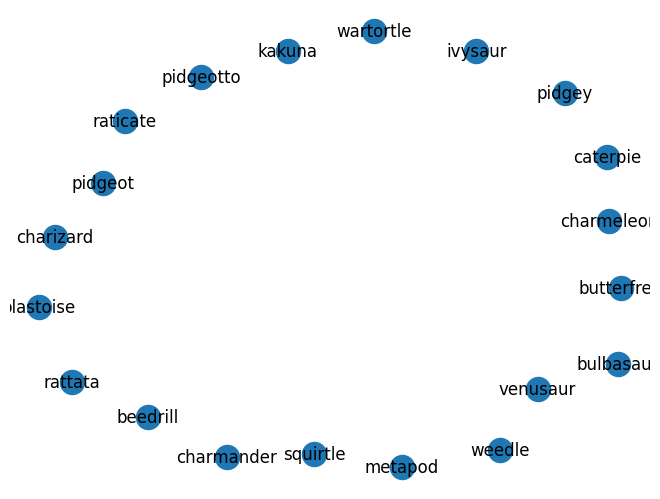

In [19]:
def main():
    pokemon_data = get_pokemon_data()
    pokemon_graph = construct_pokemon_graph(pokemon_data)
    num_random_pokemon = 5  # Adjust the number of random Pokémon as needed
    random_pokemon_data = generate_random_pokemon_data(pokemon_data, num_random_pokemon)
    perform_experiment(pokemon_data, random_pokemon_data)
    nx.draw(pokemon_graph, with_labels=True)
    plt.show()

if __name__ == "__main__":
    main()
